In [1]:
%%time

from config.config_lv_grids_osm import get_config_osm
from config.db_conn_local import create_session_osm 
from config.classes_db_conn.osm_load_classes import Buildings_with_Amenities, Building_wo_Amenity, Amenities_ni_Buildings, Way

from grid.lv_grid.parameterization import parameterize_by_load_profiles, parameterize_by_load_profiles_IT_DEPRECATED

from grid.lv_grid.routing import build_graph_from_ways
from shapely import wkt
from sqlalchemy import func

import pandas as pd
from sqlalchemy import create_engine
from geoalchemy2.shape import to_shape
from config.config_lv_grids_osm import get_peak_loads, get_load_profile_categories, get_config_osm 


Wall time: 4.74 s


In [2]:
session_osm = create_session_osm()


# polies from small to big
# ca 25 buildings
#polygon = wkt.loads(u'POLYGON ((9.444757321553571 47.6640820372137, 9.44469147049122 47.6642370363376, 9.442746638836271 47.6675223477341, 9.44273323863089 47.6675486765942, 9.44272335456083 47.6675846924473, 9.44272337322715 47.6675856076278, 9.44272365679015 47.667586502615, 9.442724194246059 47.6675873426787, 9.442724964738851 47.6675880952201, 9.442725938369239 47.6675887310364, 9.442771524985689 47.6676085195463, 9.442809078141879 47.6676199425426, 9.443599054706221 47.6678292167847, 9.44364298889086 47.6678391758214, 9.44369319196211 47.6678454078942, 9.443694609235431 47.6678454056071, 9.44369600193242 47.6678452280573, 9.443697323077419 47.6678448812336, 9.443698528108349 47.6678443768344, 9.443744598701199 47.6678160313241, 9.443795360184319 47.6677784822092, 9.443991191770809 47.6676599114601, 9.44421793991903 47.667570002951, 9.44446657647225 47.667512336406, 9.44472720190474 47.6674892078198, 9.444989439424219 47.6675015380556, 9.445052589744799 47.6675088406224, 9.445117064489731 47.6675174206873, 9.445183601261711 47.6675274468952, 9.44523747329856 47.6675300193568, 9.445238809309229 47.6675299032106, 9.4452400852424 47.6675296113077, 9.445241251079061 47.667529155091, 9.445242261116221 47.6675285524453, 9.445243075758549 47.6675278269953, 9.44524366307046 47.6675270071801, 9.445257172339209 47.6674916444378, 9.44526138400154 47.6674643786881, 9.44526635876986 47.6674027181877, 9.44527842375639 47.6673216144847, 9.44528702520314 47.6672820624034, 9.445343690252869 47.6671237851091, 9.44544200701166 47.6669751340207, 9.445578690330031 47.6668410756375, 9.445606929899901 47.666818179473, 9.445637520256669 47.6667867600046, 9.445694232828229 47.6667392820943, 9.445718033000571 47.6667110812337, 9.445816550854619 47.6665782840333, 9.445885789521761 47.6664961432372, 9.44592142419992 47.6664586450851, 9.44609642847751 47.6663115101204, 9.446313359526091 47.6661926345661, 9.44656247099808 47.6661073591621, 9.4468325709589 47.6660595150674, 9.447111524661491 47.6660512517601, 9.44717730910928 47.6660540322315, 9.447316189895529 47.6660649297759, 9.44753610831893 47.6660902456686, 9.44758112940486 47.6660938580278, 9.44767071891042 47.6660918313842, 9.447684852061499 47.6660900296329, 9.44774691292624 47.6660795923001, 9.4479881800759 47.6660547725018, 9.448232085468209 47.6660604809193, 9.448470258112661 47.6660965216365, 9.448560914386359 47.6661163562617, 9.44857404167368 47.6661182063231, 9.448691583060739 47.6661430580836, 9.44873711713312 47.6661476818212, 9.44936429835351 47.6661892570172, 9.44940607834077 47.66619064719, 9.44946122599818 47.6661870380657, 9.449463401923399 47.6661858503929, 9.449498075077059 47.6661578721339, 9.449520006942709 47.6661337837734, 9.45042894326825 47.6650175089795, 9.45044714891934 47.6649921250378, 9.450463499380801 47.6649559172176, 9.450463614247271 47.6649550512483, 9.450463463599689 47.664954187754, 9.450463053866351 47.6649533635807, 9.45046240253088 47.6649526138965, 9.450461537386341 47.6649519706911, 9.450460495349169 47.6649514614106, 9.45040935260457 47.6649360626301, 9.45036907619812 47.664928709451, 9.447377834868041 47.6644933952575, 9.447343269935271 47.6644880343118, 9.44730847614896 47.6644823034133, 9.44727413690042 47.6644763151236, 9.444928887305879 47.6640444576946, 9.444886220360861 47.6640381906818, 9.444829205115131 47.6640359557828, 9.4448279422305 47.6640360849357, 9.44482674602855 47.6640363876611, 9.44482566804831 47.6640368509158, 9.444757321553571 47.6640820372137))')
# ca 150 buildings 
#polygon = wkt.loads(u'POLYGON((9.48065814797112 47.702048792915,9.48067670106068 47.7021395014346,9.48066347764271 47.7023084812701,9.48060322151733 47.7024727172123,9.48049810585165 47.7026262848256,9.48035192210726 47.7027636444594,9.48016994331629 47.7028798410926,9.4799587338921 47.7029706830933,9.47972591283223 47.7030328934435,9.47947987885587 47.7030642279683,9.47934922845884 47.7030722981368,9.47934792440673 47.7030725587507,9.47934672068944 47.7030729863116,9.47934566356528 47.7030735643887,9.47934479365881 47.7030742707668,9.47934414440016 47.7030750783002,9.47934374073991 47.7030759559558,9.479336776973 47.7031206087375,9.47932811383377 47.7039767787497,9.47930419238297 47.7041397502748,9.47923653630674 47.7042970032425,9.47912743128483 47.7044432241517,9.47898056362106 47.704573472226,9.4788008957201 47.7046833463729,9.47859449842742 47.7047691339106,9.47836834589566 47.7048279360353,9.47813007990952 47.7048577657854,9.47799942474244 47.7048658343318,9.47799812063796 47.7048660949293,9.47799691686738 47.704866522475,9.47799585969107 47.7048671005385,9.4779949897356 47.7048678069052,9.47799434043296 47.7048686144299,9.47799393673543 47.7048694920797,9.47798697154557 47.7049141447356,9.4779787295344 47.7057265448722,9.47798478818284 47.7057712596147,9.47798517404136 47.7057721410293,9.47798580690837 47.7057729546676,9.47798666246323 47.7057736692622,9.47798770782735 47.7057742573515,9.47798890282809 47.7057746963355,9.4779902015421 47.7057749693445,9.47805627420604 47.7057796855643,9.47925836179254 47.7057854103959,9.47932452365425 47.7057813239307,9.47939684134063 47.7057668720675,9.47947074051022 47.7057461669742,9.47970464719749 47.7057122633707,9.4799437768382 47.7057074870088,9.48018025507286 47.7057319951709,9.48034744636498 47.7057711862927,9.48037689470352 47.7057757983759,9.48037825014002 47.7057758265235,9.48043195925295 47.7057697338835,9.48047172866012 47.7057610034903,9.48133621703282 47.7055388618592,9.48135885400651 47.7055327249778,9.48138130051303 47.705526317869,9.48140359308013 47.7055196301061,9.48184265548561 47.7053814134536,9.48188497300641 47.7053668406817,9.48192634797981 47.7053513243399,9.48196703670106 47.705334768313,9.48261598271012 47.7050491257199,9.48284333280551 47.704969152505,9.48308929237145 47.7049204267937,9.48334456355668 47.7049047905248,9.48459384072616 47.704910679556,9.48466000103303 47.7049065898632,9.48466130510465 47.7049063291863,9.48466250882066 47.7049059015673,9.48466356592275 47.7049053234393,9.48466443578721 47.7049046170195,9.48466508498556 47.7049038094553,9.48466548856953 47.7049029317807,9.48467244796152 47.7048582786949,9.48467252083228 47.7048510026062,9.48470144355156 47.7046713355684,9.48478341991812 47.7044993167496,9.48491507631957 47.7043420242559,9.48509099507982 47.7042059301838,9.48530393743215 47.7040966343336,9.48554514139163 47.7040186338194,9.48580468226796 47.7039751380528,9.48607188098854 47.7039679367057,9.48633574343929 47.703997326084,9.48658541275859 47.704062096937,9.48665996453331 47.7040875703233,9.48666125058864 47.7040878085908,9.4867167774489 47.7040903270379,9.48675968026844 47.7040879027794,9.48836847986512 47.7039418050495,9.4884117301121 47.7039363032622,9.48846597903209 47.7039231915254,9.48846705282667 47.7039227432537,9.48846796485505 47.7039221536213,9.48846867510225 47.7039214484983,9.48846915240659 47.7039206588216,9.48847935080848 47.7038823344878,9.48848025539496 47.703852595877,9.48842973702086 47.7027828505263,9.48844378123493 47.7026216774512,9.48850063100891 47.7024648693601,9.48859841913968 47.7023175754942,9.48865532790434 47.7022617469993,9.48868669396787 47.702222722459,9.48868709746194 47.7022218447685,9.48869405298831 47.702177191366,9.48870212495492 47.7013647888932,9.48869605749258 47.7013200746416,9.48869567148364 47.7013191932628,9.48869503850179 47.7013183796845,9.48869418287212 47.7013176651721,9.48869313747609 47.7013170771837,9.48869194248755 47.7013166383156,9.4886906438294 47.7013163654331,9.48862457593146 47.7013116556256,9.48742259199815 47.7013060337188,9.4873564365445 47.7013101250925,9.48735513257782 47.701310385802,9.48735392896852 47.7013108134515,9.48735287197076 47.7013113916065,9.48735200220425 47.701312098049,9.48735135309372 47.7013129056306,9.48733547721792 47.7013474377041,9.48729880272183 47.7014642066402,9.48718750471712 47.7016336934443,9.48702670182373 47.7017839298192,9.48682336012544 47.7019084070581,9.48658628881307 47.7020017323772,9.48632575854415 47.7020598625765,9.48623025600094 47.7020739303646,9.48617046017902 47.7020907513363,9.48604806357768 47.7021335412969,9.48580331253464 47.7021817585738,9.48554939661524 47.70219722886,9.48475058108646 47.702193471732,9.48468442427628 47.7021975614879,9.4846831202735 47.7021978221655,9.48468191662114 47.7021982497853,9.48468085957504 47.7021988279143,9.48461736729804 47.7022503929486,9.48443111462172 47.7023742811523,9.48421235274966 47.7024708953687,9.48396968035719 47.7025364380003,9.48371263609498 47.702568332763,9.48345132361183 47.7025653259663,9.48319601435324 47.7025275357989,9.48295674375924 47.7024564476832,9.48274291674611 47.7023548558783,9.48256293798974 47.7022267536309,9.48242388155127 47.7020771761945,9.48233121283449 47.7019120028899,9.48225890353158 47.701730597702,9.48224568495493 47.701703164647,9.4822201219771 47.7016691405087,9.48221931544813 47.7016684616587,9.48221831995788 47.7016679091309,9.48221717790197 47.701667506456,9.48221593791797 47.7016672707831,9.48221465281409 47.7016672121489,9.48215874690368 47.7016725113534,9.48211790122247 47.7016808820075,9.48167200443362 47.7017895566957,9.4816344148702 47.7018000918094,9.48158928266617 47.7018181334203,9.48157294080893 47.7018278627516,9.48136857897516 47.7019277897901,9.48113978789522 47.7019995726057,9.48089494607431 47.70204058243,9.48065814797112 47.702048792915))')
# ca 4000
polygon = wkt.loads(u'POLYGON ((4281997.41869224 2732185.07316504, 4281998.88075016 2732195.14230024, 4281998.01576282 2732213.92516569, 4281993.61512521 2732232.20571892, 4281985.83757831 2732249.32453903, 4281974.9636758 2732264.66411145, 4281961.38566396 2732277.67110312, 4281945.59333238 2732287.87632242, 4281928.15634618 2732294.91164401, 4281909.70369689 2732298.52328794, 4281899.89836158 2732299.48902918, 4281899.80062908 2732299.51867601, 4281899.71055828 2732299.56681985, 4281899.63161057 2732299.63161056, 4281899.56681985 2732299.71055828, 4281899.51867601 2732299.80062907, 4281899.48902918 2732299.89836158, 4281899 2732304.86355813, 4281899 2732400, 4281897.32744326 2732418.12094891, 4281892.36628708 2732435.62960862, 4281884.28416412 2732451.93437859, 4281873.35416141 2732466.48433653, 4281859.9455931 2732478.78785356, 4281844.51152164 2732488.42920582, 4281827.57344925 2732495.08262142, 4281809.70369689 2732498.52328794, 4281799.89836158 2732499.48902918, 4281799.80062908 2732499.51867601, 4281799.71055828 2732499.56681985, 4281799.63161057 2732499.63161056, 4281799.56681985 2732499.71055828, 4281799.51867601 2732499.80062907, 4281799.48902918 2732499.89836158, 4281799 2732504.86355813, 4281799 2732595.13644187, 4281799.48902918 2732600.10163842, 4281799.51867601 2732600.19937093, 4281799.56681985 2732600.28944172, 4281799.63161057 2732600.36838944, 4281799.71055828 2732600.43318015, 4281799.80062908 2732600.48132399, 4281799.89836158 2732600.51097082, 4281804.86355813 2732601, 4281895.13644187 2732601, 4281900.10163842 2732600.51097082, 4281905.52122057 2732598.86695855, 4281911.05481399 2732596.52729832, 4281928.59387086 2732592.63659849, 4281946.54726737 2732591.97962414, 4281964.32378142 2732594.57801004, 4281976.90843708 2732598.84446971, 4281979.1233037 2732599.34140188, 4281979.22510906 2732599.34381457, 4281983.25367623 2732598.63851471, 4281986.23346757 2732597.64747867, 4282050.98250327 2732572.50907546, 4282052.67774805 2732571.81526867, 4282054.35848586 2732571.09153676, 4282056.02745182 2732570.33670197, 4282088.89368292 2732554.74796176, 4282092.06044497 2732553.10647598, 4282095.15571594 2732551.36064439, 4282098.19866948 2732549.49965245, 4282146.71482044 2732517.41992253, 4282163.72714343 2732508.41445931, 4282182.16056123 2732502.87130051, 4282201.31821599 2732501, 4282295.13644187 2732501, 4282300.10163842 2732500.51097082, 4282300.19937092 2732500.48132399, 4282300.28944172 2732500.43318015, 4282300.36838943 2732500.36838944, 4282300.43318015 2732500.28944172, 4282300.48132399 2732500.19937093, 4282300.51097082 2732500.10163842, 4282301 2732495.13644187, 4282301 2732494.32793279, 4282303.03682233 2732474.34938989, 4282309.06347831 2732455.19292259, 4282318.83198354 2732437.6467798, 4282331.9403843 2732422.43294888, 4282347.84929708 2732410.17744743, 4282365.90410312 2732401.38456392, 4282385.3618846 2732396.41610726, 4282405.42199416 2732395.47651914, 4282425.25899991 2732398.60446167, 4282444.0566502 2732405.67122648, 4282449.67425281 2732408.46281173, 4282449.77100851 2732408.48861632, 4282453.94272214 2732408.73951837, 4282457.16272239 2732408.44779934, 4282577.86753831 2732391.37758309, 4282581.11134693 2732390.74380087, 4282585.17543061 2732389.25874244, 4282585.25573357 2732389.20837591, 4282585.32378301 2732389.14238633, 4282585.37659329 2732389.06366895, 4282585.41184738 2732388.97567747, 4282586.14909619 2732384.71203595, 4282586.19482672 2732381.40720873, 4282581.60244345 2732262.57045071, 4282582.53680519 2732244.65468309, 4282586.68904681 2732227.20169909, 4282593.92281594 2732210.78462428, 4282598.15490424 2732204.55179615, 4282600.48132399 2732200.19937093, 4282600.51097082 2732200.10163842, 4282601 2732195.13644187, 4282601 2732104.86355813, 4282600.51097082 2732099.89836158, 4282600.48132399 2732099.80062907, 4282600.43318015 2732099.71055828, 4282600.36838943 2732099.63161056, 4282600.28944172 2732099.56681985, 4282600.19937092 2732099.51867601, 4282600.10163842 2732099.48902918, 4282595.13644187 2732099, 4282504.86355813 2732099, 4282499.89836158 2732099.48902918, 4282499.80062908 2732099.51867601, 4282499.71055828 2732099.56681985, 4282499.63161057 2732099.63161056, 4282499.56681985 2732099.71055828, 4282499.51867601 2732099.80062907, 4282498.35223764 2732103.64586105, 4282495.68536327 2732116.63952152, 4282487.45377848 2732135.52967954, 4282475.4900696 2732152.30664972, 4282460.31252617 2732166.24362334, 4282442.57866683 2732176.73682548, 4282423.05675446 2732183.33167163, 4282415.8951919 2732184.94459055, 4282411.41722228 2732186.84480967, 4282402.2575052 2732191.66318818, 4282383.91324626 2732197.14848334, 4282364.85616923 2732199, 4282304.86355813 2732199, 4282299.89836158 2732199.48902918, 4282299.80062908 2732199.51867601, 4282299.71055828 2732199.56681985, 4282299.63161057 2732199.63161056, 4282294.90222514 2732205.39438339, 4282281.00817311 2732219.25746108, 4282264.65228409 2732230.10709237, 4282246.47742844 2732237.51683104, 4282227.1979713 2732241.19543635, 4282207.57169427 2732240.99832021, 4282188.37001077 2732236.93323032, 4282170.34764553 2732229.15994555, 4282154.21297 2732217.98399591, 4282140.60015974 2732203.84465357, 4282130.04426807 2732187.29766726, 4282122.9601957 2732168.99341848, 4282117.39278732 2732148.8749034, 4282116.37935611 2732145.8336756, 4282114.43388927 2732142.06657956, 4282114.37280666 2732141.99157426, 4282114.29762866 2732141.93070433, 4282114.21155693 2732141.88656208, 4282114.11825708 2732141.86102743, 4282114.02170253 2732141.85518784, 4282109.82721968 2732142.47338469, 4282106.76606956 2732143.42494621, 4282073.36180495 2732155.73464355, 4282070.54683642 2732156.92501199, 4282067.17110368 2732158.95342197, 4282065.9512084 2732160.04307885, 4282050.6794854 2732171.25385801, 4282033.55190822 2732179.35035063, 4282015.19567907 2732184.03606773, 4281997.41869224 2732185.07316504))')


In [3]:
# sqlachemy local osm data
DB = 'postgresql'
DB_USER = 'postgres'
DB_PW   = 'labor'
DB_Name = 'sandbox_bw' 
engine_osm = create_engine(DB + '://' + DB_USER + ': ' + DB_PW + '@localhost:5432/' + DB_Name, echo=False)
session_osm = create_session_osm()


#### ways

In [4]:
import osmnx as ox
import networkx as nx
from grid.lv_grid.db_conn_load_osm_data import get_osm_ways
from geoalchemy2.shape import to_shape


In [5]:
%%time


ways_db = get_osm_ways(polygon.wkt, session_osm)


# iterative
graph = build_graph_from_ways(ways_db, polygon, retain_all=True, truncate_by_edge=False)

len(graph.nodes), len(graph.edges)

Wall time: 249 ms


(133, 270)

In [6]:
def build_graph(ways_sql_df):
    
    """
    buid a graph for given ways_sql_df
    return graph
    """
    
    # preprocess df elementd
    # get list contatining lists
    nodes_list = ways_sql_df.nodes.tolist()
    coord_list = ways_sql_df.geometry.tolist()

    #flatten lists
    nodes_flat_list = [item for sublist in nodes_list for item in sublist]
    geoos_flat_list = [item for sublist in coord_list for item in sublist]
    x, y = list(map(list, zip(*geoos_flat_list)))

    # create df for nodes with coords
    nodes_w_coords = pd.DataFrame(list(zip(nodes_flat_list, x, y)), columns=['node', 'x', 'y'])

    # drop duplicates
    nodes_w_coords.drop_duplicates(subset ="node", keep = 'first', inplace = True)
    
    
    
    # init a graph and set srid.
    graph = nx.MultiGraph()
    graph.graph["crs"] = 'epsg:'+str(get_config_osm('srid')) 
    

    # add_edge(u,v,geometry=line,length=leng,highway=highway,osmid=osmid) 
    [
        graph.add_edge(node, nodes_sublist[nodes_sublist.index(node)+1], 
                       length=length_segments_sublist[nodes_sublist.index(node)], 
                       osmid=osm_id, highway=highway)
        for osm_id, nodes_sublist, highway, length_segments_sublist in zip(ways_sql_df['osm_id'], ways_sql_df['nodes'], ways_sql_df['highway'], ways_sql_df['length_segments'])
        for node in nodes_sublist
        if nodes_sublist.index(node) < len(nodes_sublist)-1 
    ]
    
    
    def update_node(node, x, y):
    
        graph.nodes[node]['x'] = x
        graph.nodes[node]['y'] = y
        graph.nodes[node]['node_type'] = 'non_synthetic'
        
    
    # toto: update node coords
    [update_node(node, x, y) for node, x, y in zip(nodes_w_coords['node'], nodes_w_coords['x'], nodes_w_coords['y'])]
    
    return graph

In [7]:
%%time


ways_db = get_osm_ways(polygon.wkt, session_osm)


# new approach build graph from df
ways_sql_df = pd.read_sql(
    ways_db.statement,
    #con=session_osm.bind both ways are working. select the easier/ more appropriate one
    con=engine_osm
)


# to_shape(geo)
ways_sql_df['geometry'] = ways_sql_df.apply(lambda way: to_shape(way.geometry), axis=1)

# get coords from linestring
ways_sql_df['geometry'] = ways_sql_df.apply(lambda x: list(x['geometry'].coords), axis=1)

G = build_graph(ways_sql_df)

Wall time: 249 ms


133 270


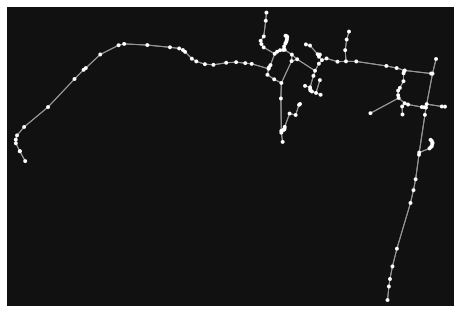

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [8]:
print(len(graph.nodes), len(graph.edges))
ox.plot_graph(graph)

133 135


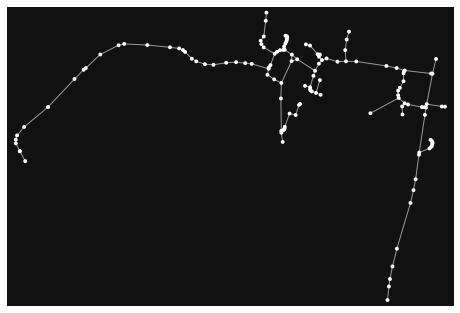

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [9]:
print(len(G.nodes), len(G.edges))
ox.plot_graph(G)

#### buildings

In [3]:
%%time

### Load bays
ways = session_osm.query(Way).filter(func.st_intersects(func.ST_GeomFromText(polygon.wkt, get_config_osm('srid')), Way.geometry)) 


graph = build_graph_from_ways(ways, polygon, False, False)


### Load buildings_w_a
buildings_w_a = session_osm.query(Buildings_with_Amenities).filter(func.st_intersects(func.ST_GeomFromText(polygon.wkt, get_config_osm('srid')), Buildings_with_Amenities.geometry_amenity)) 

### Load buildings_wo_a
buildings_wo_a = session_osm.query(Building_wo_Amenity).filter(func.st_intersects(func.ST_GeomFromText(polygon.wkt, get_config_osm('srid')), Building_wo_Amenity.geometry)) 

### Load buildings_wo_a
amenities_ni_Buildings = session_osm.query(Amenities_ni_Buildings).filter(func.st_intersects(func.ST_GeomFromText(polygon.wkt, get_config_osm('srid')), Amenities_ni_Buildings.geometry)) 


# parameterization and merge to buildings_df
buildings_w_loads_deprecated = parameterize_by_load_profiles_IT_DEPRECATED(buildings_w_a, buildings_wo_a, amenities_ni_Buildings)

bicycle_parking is not matched in config and will be categorized as leftover
parking_entrance is not matched in config and will be categorized as leftover
Wall time: 31.1 s


In [5]:
%%time


### Load bays
ways = session_osm.query(Way).filter(func.st_intersects(func.ST_GeomFromText(polygon.wkt, get_config_osm('srid')), Way.geometry)) 


graph = build_graph_from_ways(ways, polygon, False, False)

### Load buildings_w_a
buildings_w_a = session_osm.query(Buildings_with_Amenities).filter(func.st_intersects(func.ST_GeomFromText(polygon.wkt, get_config_osm('srid')), Buildings_with_Amenities.geometry_amenity)) 

### Load buildings_wo_a
buildings_wo_a = session_osm.query(Building_wo_Amenity).filter(func.st_intersects(func.ST_GeomFromText(polygon.wkt, get_config_osm('srid')), Building_wo_Amenity.geometry)) 

### Load buildings_wo_a
amenities_ni_Buildings = session_osm.query(Amenities_ni_Buildings).filter(func.st_intersects(func.ST_GeomFromText(polygon.wkt, get_config_osm('srid')), Amenities_ni_Buildings.geometry)) 




# start with amenities due to they have no shape, only a point, 
# thus, they are handled a ltiitle bit different
amenities_ni_Buildings_sql_df = pd.read_sql(
    amenities_ni_Buildings.statement,
    #con=session_osm.bind both ways are working. select the easier/ more appropriate one
    con=engine_osm
)

buildings_w_a_sql_df = pd.read_sql(
    buildings_w_a.statement,
    con=engine_osm
)

buildings_wo_a_sql_df = pd.read_sql(
    buildings_wo_a.statement,
    con=engine_osm
)


buildings_w_loads_df = parameterize_by_load_profiles(amenities_ni_Buildings_sql_df, buildings_w_a_sql_df, buildings_wo_a_sql_df)


bicycle_parking is not matched in config and will be categorized as leftover
parking_entrance is not matched in config and will be categorized as leftover
Int64Index([2156763960, 1609306281, 6496210741, 2156864479], dtype='int64')
Wall time: 3.13 s


In [6]:
print(len(buildings_w_loads_df))
buildings_w_loads_df.capacity.sum()

3786


90051.73943655926

In [7]:
print(len(buildings_w_loads_deprecated))
buildings_w_loads_deprecated.capacity.sum()

3786


90237.15127040542

In [19]:
buildings_w_loads_df.loc[buildings_w_loads_df.index==6496210741]['capacity'].values[0]

1522.23732

In [20]:
buildings_w_loads_deprecated.loc[buildings_w_loads_deprecated.index==6496210741]['capacity'].values[0]

1707.6491538461537

In [21]:
abs(buildings_w_loads_df.loc[buildings_w_loads_df.index==6496210741]['capacity'].values[0] - buildings_w_loads_deprecated.loc[buildings_w_loads_deprecated.index==6496210741]['capacity'].values[0])

185.41183384615374

In [9]:
buildings_w_loads_df[['category', 'area', 'capacity']].sort_values('capacity', ascending=False)

,category,area,capacity
208859161,industrial,37356.600,6145.160700
208885938,industrial,32156.800,5289.793600
132279038,industrial,15819.300,2602.274850
132279034,industrial,12396.400,2039.207800
139755343,industrial,11885.900,1955.230550
...,...,...,...
567262993,place_of_worship,1079.640,0.053982
233295401,place_of_worship,434.866,0.043487
241360980,place_of_worship,386.289,0.038629
547490603,place_of_worship,214.686,0.021469
